# Predict the deposite of 2017

In [1]:
import pandas as pd
df2010 = pd.read_csv('ALL_2010.csv', thousands=',')
df2011 = pd.read_csv('ALL_2011.csv', thousands=',')
df2012 = pd.read_csv('ALL_2012.csv', thousands=',')
df2013 = pd.read_csv('ALL_2013.csv', thousands=',')
df2014 = pd.read_csv('ALL_2014.csv', thousands=',')
df2015 = pd.read_csv('ALL_2015.csv', thousands=',')
df2016 = pd.read_csv('ALL_2016.csv', thousands=',')

/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df2010_chase = df2010[df2010.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
df2011_chase = df2011[df2011.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
df2012_chase = df2012[df2012.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
df2013_chase = df2013[df2013.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
df2014_chase = df2014[df2014.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
df2015_chase = df2015[df2015.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
df2016_chase = df2016[df2016.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
# df2017_chase = df2017[df2017.NAMEFULL == 'JPMorgan Chase Bank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
map(lambda word: ' '.join(map(str.capitalize, word.split())), df2016_chase.STNAMEBR)
# df2016_chase.STNAMEBR.str.lower()
# df2016_chase[:5]

In [3]:
df2010_chase.loc[df2010_chase.STNAMEBR == 'District of Columbia', 'STNAMEBR'] ='District Of Columbia'
df2011_chase.loc[df2011_chase.STNAMEBR == 'District of Columbia', 'STNAMEBR'] ='District Of Columbia'

In [4]:
import numpy as np
np.shape(df2010_chase),np.shape(df2011_chase),np.shape(df2012_chase),np.shape(df2013_chase),np.shape(df2014_chase),np.shape(df2015_chase),np.shape(df2016_chase)
# ,np.shape(df2017_chase)

((5251, 3), (5431, 3), (5603, 3), (5694, 3), (5679, 3), (5545, 3), (5413, 3))

In [5]:
chase01 = pd.merge(df2010_chase, df2011_chase, on = ['BRNUM','STNAMEBR'], how = 'outer')
chase012 = pd.merge(chase01, df2011_chase, on = ['BRNUM','STNAMEBR'], how = 'outer')
chase0123 = pd.merge(chase012, df2013_chase, on = ['BRNUM','STNAMEBR'], how = 'outer')
chase01234 = pd.merge(chase0123, df2014_chase, on = ['BRNUM','STNAMEBR'], how = 'outer')
chase012345 = pd.merge(chase01234, df2015_chase, on = ['BRNUM','STNAMEBR'], how = 'outer')
chaseall = pd.merge(chase012345, df2016_chase, on = ['BRNUM','STNAMEBR'], how = 'outer')
chaseall.columns = ['branch_number','2010','state','2011','2012','2013','2014','2015','2016']
chaseall = chaseall[['branch_number','state','2010','2011','2012','2013','2014','2015','2016']].fillna(0)
# pd.to_numeric(chaseall['2010'])
# chaseall

In [6]:
chaseall = chaseall[(chaseall.loc[:, '2010':'2016'] != 0).any(axis=1)]
# chaseall

### Linear regression

In [7]:
from sklearn import linear_model
X = chaseall[['2010','2011','2012','2013','2014']]
Y = chaseall[['2015']]
P = chaseall[['2012','2013','2014','2015','2016']]
linearmodel = linear_model.LinearRegression()
linearmodel.fit(X , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
linearmodel.predict(P)

array([[  1.45538079e+05],
       [  5.28561689e+07],
       [  1.23012383e+04],
       ..., 
       [  1.58666499e+04],
       [  3.17605025e+04],
       [  1.08742653e+04]])

# Where to build new branches & which to close 

### chase

In [1]:
chase2016 = chaseall[['branch_number', 'state','2016']]
chase2016 = chase2016[(chase2016.loc[:, '2016'] != 0)]
# chase2016

group2016 = chase2016.groupby(['state'])['2016']

chase2016 = pd.merge(group2016.count().to_frame(), group2016.sum().to_frame(), left_index=True, right_index=True)
chase2016 = pd.merge(chase2016, group2016.median().to_frame(), left_index=True, right_index=True)
# group2016.describe()
chase2016 = chase2016.reset_index()
chase2016.columns = ['state','2016count','2016sum','2016median']
# chase2016

NameError: name 'chaseall' is not defined

In [2]:
chase2015 = chaseall[['branch_number', 'state','2015']]
chase2015 = chase2015[(chase2015.loc[:, '2015'] != 0)]
# chase2015

group2015 = chase2015.groupby(['state'])['2015']

chase2015 = pd.merge(group2015.count().to_frame(), group2015.sum().to_frame(), left_index=True, right_index=True)
chase2015 = pd.merge(chase2015, group2015.median().to_frame(), left_index=True, right_index=True)
# group2015.describe()
chase2015 = chase2015.reset_index()
chase2015.columns = ['state','2015count','2015sum','2015median']
# chase2015[:5]


NameError: name 'chaseall' is not defined

In [11]:
chase2014 = chaseall[['branch_number', 'state','2014']]
chase2014 = chase2014[(chase2014.loc[:, '2014'] != 0)]
# chase2014

group2014 = chase2014.groupby(['state'])['2014']

chase2014 = pd.merge(group2014.count().to_frame(), group2014.sum().to_frame(), left_index=True, right_index=True)
chase2014 = pd.merge(chase2014, group2014.median().to_frame(), left_index=True, right_index=True)
# group2014.describe()
chase2014 = chase2014.reset_index()
chase2014.columns = ['state','2014count','2014sum','2014median']
# chase2014[:5]

,state,2014count,2014sum,2014median
0,Arizona,281,25260613.0,48889.0
1,California,1055,92974133.0,64634.0
2,Colorado,117,9965007.0,38067.0
3,Connecticut,52,5056325.0,76419.5
4,Florida,378,21621094.0,41907.5


In [12]:
chase2013 = chaseall[['branch_number', 'state','2013']]
chase2013 = chase2013[(chase2013.loc[:, '2013'] != 0)]
# chase2013

group2013 = chase2013.groupby(['state'])['2013']

chase2013 = pd.merge(group2013.count().to_frame(), group2013.sum().to_frame(), left_index=True, right_index=True)
chase2013 = pd.merge(chase2013, group2013.median().to_frame(), left_index=True, right_index=True)
# group2013.describe()
chase2013 = chase2013.reset_index()
chase2013.columns = ['state','2013count','2013sum','2013median']
# chase2013[:5]

,state,2013count,2013sum,2013median
0,Arizona,290,24024890.0,37939.0
1,California,1019,82061171.0,61688.0
2,Colorado,119,11073657.0,31327.0
3,Connecticut,51,4809790.0,70702.0
4,Florida,354,18528035.0,37199.0


In [13]:
chasesta = pd.merge(chase2013,chase2014, on = ['state'], how = 'outer')
chasesta = pd.merge(chasesta,chase2015, on = ['state'], how = 'outer')
chasesta = pd.merge(chasesta,chase2016, on = ['state'], how = 'outer')
chasesta['2015label_change'] = chasesta['2015count']-chasesta['2014count'] 
chasesta['2016label_change'] = chasesta['2016count']-chasesta['2015count'] 
# chasesta

In [14]:
def changetolabel(rows):
    a = list()
    for row in rows:
        if row > 0: 
            a.append(1)
        elif row == 0:
            a.append(2)
        else:
            a.append(-1)
    return a 
chasesta['2015label'] = changetolabel(chasesta['2015label_change'])
chasesta['2016label'] = changetolabel(chasesta['2016label_change'])
# chasesta

In [15]:
states = pd.DataFrame(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
                       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
                       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
                       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
                       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
                       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
                       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],columns = ['state'])
states = pd.merge(states, chasesta, on = ['state'], how = 'outer').fillna(0)
# states.drop([''])
# states

### BOA

In [16]:
df2014_boa = df2014[df2014.NAMEFULL == 'Bank of America, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
boa2014 = df2014_boa[(df2014_boa.loc[:, 'DEPSUMBR'] != 0)]
boa2014 = boa2014.groupby(['STNAMEBR'])['DEPSUMBR'].count().to_frame()
boa2014 = boa2014.reset_index()
boa2014.columns = ['state','boa_count']
# boa2014

df2015_boa = df2015[df2015.NAMEFULL == 'Bank of America, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
boa2015 = df2015_boa[(df2015_boa.loc[:, 'DEPSUMBR'] != 0)]
boa2015 = boa2015.groupby(['STNAMEBR'])['DEPSUMBR'].count().to_frame()
boa2015 = boa2015.reset_index()
boa2015.columns = ['state','boa_count']
# boa2015

df2016_boa = df2016[df2016.NAMEFULL == 'Bank of America, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
boa2016 = df2016_boa[(df2016_boa.loc[:, 'DEPSUMBR'] != 0)]
boa2016 = boa2016.groupby(['STNAMEBR'])['DEPSUMBR'].count().to_frame()
boa2016 = boa2016.reset_index()
boa2016.columns = ['state','boa_count']
# boa2016

### CITI

In [17]:
df2014_citi = df2014[df2014.NAMEFULL == 'Citibank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
citi2014 = df2014_citi[(df2014_citi.loc[:, 'DEPSUMBR'] != 0)]
citi2014 = citi2014.groupby(['STNAMEBR'])['DEPSUMBR'].count().to_frame()
citi2014 = citi2014.reset_index()
citi2014.columns = ['state','citi_count']
citi2014

df2015_citi = df2015[df2015.NAMEFULL == 'Citibank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
citi2015 = df2015_citi[(df2015_citi.loc[:, 'DEPSUMBR'] != 0)]
citi2015 = citi2015.groupby(['STNAMEBR'])['DEPSUMBR'].count().to_frame()
citi2015 = citi2015.reset_index()
citi2015.columns = ['state','citi_count']
# citi2015

df2016_citi = df2016[df2016.NAMEFULL == 'Citibank, National Association'][['BRNUM','DEPSUMBR','STNAMEBR']]
citi2016 = df2016_citi[(df2016_citi.loc[:, 'DEPSUMBR'] != 0)]
citi2016 = citi2016.groupby(['STNAMEBR'])['DEPSUMBR'].count().to_frame()
citi2016 = citi2016.reset_index()
citi2016.columns = ['state','citi_count']
# citi2016


### income

In [18]:
import pandas as pd
income = pd.read_csv('income.csv', thousands=',')
income.columns = [['state','2016','2015','2014','2013','2012','2011','2010']]
income['state'][8] = 'District of Columbia'
income2014 = income[['state','2014']]
income2014.columns = [['state','income']]
income2015 = income[['state','2015']]
income2015.columns = [['state','income']]
income2016 = income[['state','2016']]
income2016.columns = [['state','income']]

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### states

In [25]:
index2014 = pd.read_csv('2014state.csv')[['Geography','Estimate; TOTAL NUMBER OF RACES REPORTED - Total population','Estimate; SEX AND AGE - Total population - Male',
     'Estimate; SEX AND AGE - Total population - Female','Estimate; SEX AND AGE - Median age (years)','Estimate; EDUCATIONAL ATTAINMENT - Bachelor\'s degree or higher',
      'Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force','Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage',
      'Estimate; POVERTY RATES FOR FAMILIES AND PEOPLE FOR WHOM POVERTY STATUS IS DETERMINED - All people']]
index2014.columns = [['state','total_population','male','female','median_age','bachelor_or_higher','labor','no_insurance','poverty']]
index2014['total_population'] = (index2014['total_population']-index2014['total_population'].min())/ index2014['total_population'].max()
index2014['male'] = (index2014['male']-index2014['male'].min())/ index2014['male'].max()
index2014['female'] = (index2014['female']-index2014['female'].min())/ index2014['female'].max()
index2014['median_age'] = (index2014['median_age']-index2014['median_age'].min())/ index2014['median_age'].max()
index2014['bachelor_or_higher'] = (index2014['bachelor_or_higher']-index2014['bachelor_or_higher'].min())/ index2014['bachelor_or_higher'].max()
index2014['labor'] = (index2014['labor']-index2014['labor'].min())/ index2014['labor'].max()
index2014['no_insurance'] = (index2014['no_insurance']-index2014['no_insurance'].min())/ index2014['no_insurance'].max()
index2014['poverty'] = (index2014['poverty']-index2014['poverty'].min())/ index2014['poverty'].max()
# index2014

In [24]:
index2015 = pd.read_csv('2015state.csv')[['Geography','Estimate; TOTAL NUMBER OF RACES REPORTED - Total population','Estimate; SEX AND AGE - Total population - Male',
     'Estimate; SEX AND AGE - Total population - Female','Estimate; SEX AND AGE - Median age (years)','Estimate; EDUCATIONAL ATTAINMENT - Bachelor\'s degree or higher',
      'Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force','Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage',
      'Estimate; POVERTY RATES FOR FAMILIES AND PEOPLE FOR WHOM POVERTY STATUS IS DETERMINED - All people']]
index2015.columns = [['state','total_population','male','female','median_age','bachelor_or_higher','labor','no_insurance','poverty']]
index2015['total_population'] = (index2015['total_population']-index2015['total_population'].min())/ index2015['total_population'].max()
index2015['male'] = (index2015['male']-index2015['male'].min())/ index2015['male'].max()
index2015['female'] = (index2015['female']-index2015['female'].min())/ index2015['female'].max()
index2015['median_age'] = (index2015['median_age']-index2015['median_age'].min())/ index2015['median_age'].max()
index2015['bachelor_or_higher'] = (index2015['bachelor_or_higher']-index2015['bachelor_or_higher'].min())/ index2015['bachelor_or_higher'].max()
index2015['labor'] = (index2015['labor']-index2015['labor'].min())/ index2015['labor'].max()
index2015['no_insurance'] = (index2015['no_insurance']-index2015['no_insurance'].min())/ index2015['no_insurance'].max()
index2015['poverty'] = (index2015['poverty']-index2015['poverty'].min())/ index2015['poverty'].max()
# index2015

In [31]:
index2016 = pd.read_csv('2015state.csv')[['Geography','Estimate; TOTAL NUMBER OF RACES REPORTED - Total population','Estimate; SEX AND AGE - Total population - Male',
     'Estimate; SEX AND AGE - Total population - Female','Estimate; SEX AND AGE - Median age (years)','Estimate; EDUCATIONAL ATTAINMENT - Bachelor\'s degree or higher',
      'Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force','Estimate; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage',
      'Estimate; POVERTY RATES FOR FAMILIES AND PEOPLE FOR WHOM POVERTY STATUS IS DETERMINED - All people']]
index2016.columns = [['state','total_population','male','female','median_age','bachelor_or_higher','labor','no_insurance','poverty']]
index2016['total_population'] = (index2016['total_population']-index2016['total_population'].min())/ index2016['total_population'].max()
index2016['male'] = (index2016['male']-index2016['male'].min())/ index2016['male'].max()
index2016['female'] = (index2016['female']-index2016['female'].min())/ index2016['female'].max()
index2016['median_age'] = (index2016['median_age']-index2016['median_age'].min())/ index2016['median_age'].max()
index2016['bachelor_or_higher'] = (index2016['bachelor_or_higher']-index2016['bachelor_or_higher'].min())/ index2016['bachelor_or_higher'].max()
index2016['labor'] = (index2016['labor']-index2016['labor'].min())/ index2016['labor'].max()
index2016['no_insurance'] = (index2016['no_insurance']-index2016['no_insurance'].min())/ index2016['no_insurance'].max()
index2016['poverty'] = (index2016['poverty']-index2016['poverty'].min())/ index2016['poverty'].max()
# index2016

### training data 2015

In [42]:
trainset = pd.DataFrame(states['state'],columns = ['state'])
trainset['count_change_percent'] = (states['2014count']-states['2013count'])/states['2013count']
trainset['sum_change_percent'] = (states['2014sum']-states['2013sum'])/states['2013sum']
trainset['median_change_percent'] = (states['2014median']-states['2013median'])/states['2013median']
trainset = pd.merge(trainset,boa2014, on = ['state'], how = 'outer')
trainset['boa_count'] = trainset['boa_count']/ trainset['boa_count'].max()
trainset = pd.merge(trainset,citi2014, on = ['state'], how = 'outer')
trainset['citi_count'] = trainset['citi_count']/ trainset['citi_count'].max()
trainset = pd.merge(trainset,income2014, on = ['state'], how = 'outer')
trainset['income'] = trainset['income']/ trainset['income'].max()
trainset = pd.merge(trainset,index2014, on = ['state'], how = 'outer')
trainset['label'] = states['2015label']
trainset = trainset.fillna(0)
# trainset

### testing data 2016

In [43]:
testset = pd.DataFrame(states['state'],columns = ['state'])
testset['count_change_percent'] = (states['2015count']-states['2014count'])/states['2014count']
testset['sum_change_percent'] = (states['2015sum']-states['2014sum'])/states['2014sum']
testset['median_change_percent'] = (states['2015median']-states['2014median'])/states['2014median']
testset = pd.merge(testset,boa2015, on = ['state'], how = 'outer')
testset['boa_count'] = testset['boa_count']/ testset['boa_count'].max()
testset = pd.merge(testset,citi2015, on = ['state'], how = 'outer')
testset['citi_count'] = testset['citi_count']/ testset['citi_count'].max()
testset = pd.merge(testset,income2015, on = ['state'], how = 'outer')
testset['income'] = testset['income']/ testset['income'].max()
testset = pd.merge(testset,index2015, on = ['state'], how = 'outer')
testset['label'] = states['2016label']
testset = testset.fillna(0)
# testset

### predicting data 2017

In [87]:
prediset = pd.DataFrame(states['state'],columns = ['state'])
prediset['count_change_percent'] = (states['2016count']-states['2015count'])/states['2015count']
prediset['sum_change_percent'] = (states['2016sum']-states['2015sum'])/states['2015sum']
prediset['median_change_percent'] = (states['2016median']-states['2015median'])/states['2015median']
prediset = pd.merge(prediset,boa2016, on = ['state'], how = 'outer')
prediset['boa_count'] = prediset['boa_count']/ prediset['boa_count'].max()
prediset = pd.merge(prediset,citi2016, on = ['state'], how = 'outer')
prediset['citi_count'] = prediset['citi_count']/ prediset['citi_count'].max()
prediset = pd.merge(prediset,income2016, on = ['state'], how = 'outer')
prediset['income'] = prediset['income']/ prediset['income'].max()
prediset = pd.merge(prediset,index2016, on = ['state'], how = 'outer')
prediset = prediset.fillna(0)
prediset[:5]

,state,count_change_percent,sum_change_percent,median_change_percent,boa_count,citi_count,income,total_population,male,female,median_age,bachelor_or_higher,labor,no_insurance,poverty
0,Alabama,0.000000,0.000000,0.000000,0.000000,0.0,0.619211,0.109155,0.015209,0.080153,0.181614,0.081129,0.056738,0.426901,0.468182
1,Alaska,0.000000,0.000000,0.000000,0.000000,0.0,0.992958,0.003891,0.095057,0.000000,0.060538,0.178131,0.249645,0.707602,0.095455
2,Arizona,-0.041667,0.094295,0.186247,0.156388,0.0,0.748754,0.159458,0.038023,0.057252,0.152466,0.142857,0.083688,0.467836,0.418182
3,Arkansas,0.000000,0.000000,0.000000,0.024229,0.0,0.601980,0.061109,0.028517,0.066794,0.163677,0.038801,0.066667,0.391813,0.495455
4,California,-0.020548,0.151022,0.160145,1.000000,1.0,0.873813,0.985027,0.039924,0.055344,0.125561,0.223986,0.143262,0.339181,0.322727


In [70]:
# X = trainset[['count_change_percent','sum_change_percent','median_change_percent','boa_count','citi_count','income','']]
# Y = trainset['label']
# A = testset[['count_change_percent','sum_change_percent','median_change_percent','boa_count','citi_count','income']]
# B = testset['label']
# P = prediset[['count_change_percent','sum_change_percent','median_change_percent','boa_count','citi_count','income']]
X = trainset[list(trainset)[1:-1]]
Y = trainset[list(trainset)[-1]]
A = testset[list(testset)[1:-1]]
B = testset[list(testset)[-1]]
P = prediset[list(prediset[1:])]


### logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression( multi_class = 'multinomial', solver = 'lbfgs')
logisticmodel.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
logisticmodel.predict(A)

array([ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [73]:
def ratecalcu(result):
    t = 0
    f = 0
    i = 0
    for x in result:
        if x == B[i]:
            t = t + 1 
        else: 
            f = f + 1
    print('true rate =',t/(t+f),'false rate=',f/(t+f))

In [74]:
ratecalcu(logisticmodel.predict(A))

true rate = 0.8703703703703703 false rate= 0.12962962962962962


In [75]:
from sklearn.metrics import confusion_matrix
y_true = testset['label']
y_pred = logisticmodel.predict(A)
confusion_matrix(y_true, y_pred)

array([[ 5, 13,  0,  0],
       [ 0, 31,  0,  0],
       [ 0,  1,  0,  0],
       [ 2,  2,  0,  0]])

### naive bayes 

In [76]:
from sklearn.naive_bayes import GaussianNB
naivemodel = GaussianNB()
naivemodel.fit(X, Y)

GaussianNB(priors=None)

In [77]:
naivemodel.predict(A)

array([ 0.,  0.,  2.,  0., -1.,  2.,  2.,  0., -1.,  2.,  0.,  2., -1.,
        2.,  0.,  0.,  2.,  2.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.,  2.,  0., -1.,  0.,  0.,  2.,  2.,  2.,  0.,  0.,
        0.,  0.,  0., -1., -1.,  0.,  0.,  2.,  2.,  2.,  0.,  0.,  0.,
        0.,  0.])

In [78]:
ratecalcu(naivemodel.predict(A))

true rate = 0.5740740740740741 false rate= 0.42592592592592593


In [79]:
from sklearn.metrics import confusion_matrix
y_true = testset['label']
y_pred = naivemodel.predict(A)
confusion_matrix(y_true, y_pred)

array([[ 6,  0,  0, 12],
       [ 0, 31,  0,  0],
       [ 0,  0,  0,  1],
       [ 1,  0,  0,  3]])

### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
kNNmodel = KNeighborsClassifier(n_neighbors=5)
kNNmodel.fit(X, Y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
kNNmodel.predict(A)

array([ 0.,  0.,  0.,  0., -1., -1.,  0.,  0., -1., -1.,  0., -1., -1.,
       -1.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0., -1.,  0.,  0.,  0., -1.,  0.,  0., -1., -1., -1., -1.,  0.,
        0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [82]:
ratecalcu(kNNmodel.predict(A))

true rate = 0.6851851851851852 false rate= 0.3148148148148148


In [83]:
from sklearn.metrics import confusion_matrix
y_true = testset['label']
y_pred = kNNmodel.predict(A)
confusion_matrix(y_true, y_pred)

array([[12,  6,  0,  0],
       [ 1, 30,  0,  0],
       [ 1,  0,  0,  0],
       [ 3,  1,  0,  0]])

### decision tree

In [84]:
from sklearn import tree
treemodel = tree.DecisionTreeClassifier()
treemodel.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

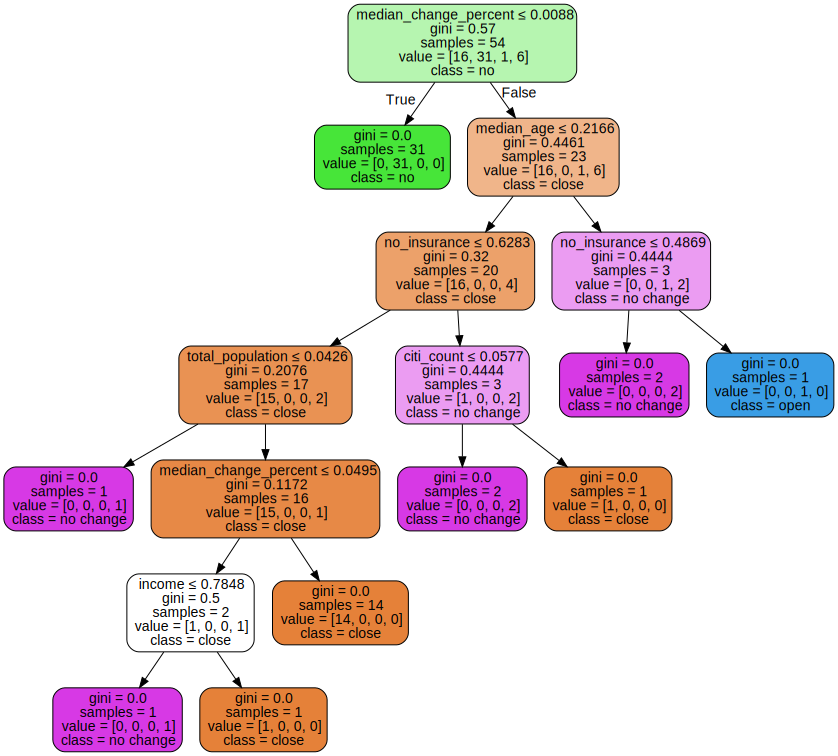

In [88]:
import graphviz 
dot_data = tree.export_graphviz(treemodel, out_file=None, feature_names = testset.columns[1:15], 
                                class_names = ['close','no','open','no change'],filled=True, 
                                rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data)  
graph 
# graph.render("branch tree") 

In [89]:
treemodel.predict(A)

array([ 0.,  0., -1.,  0., -1., -1.,  0.,  0.,  1.,  2.,  0.,  2., -1.,
       -1.,  0.,  0.,  2.,  2.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0., -1.,  0., -1.,  0., -1.,  0.,  0., -1.,  2., -1.,  0.,  0.,
        0.,  0.,  0.,  2., -1.,  0.,  0., -1.,  2.,  2.,  0.,  0.,  0.,
        0.,  0.])

In [90]:
ratecalcu(treemodel.predict(A))

true rate = 0.5925925925925926 false rate= 0.4074074074074074


In [91]:
from sklearn.metrics import confusion_matrix
y_true = testset['label']
y_pred = treemodel.predict(A)
confusion_matrix(y_true, y_pred)

array([[12,  1,  0,  5],
       [ 0, 31,  0,  0],
       [ 1,  0,  0,  0],
       [ 0,  0,  1,  3]])

### neural network

In [92]:
from sklearn.neural_network import MLPClassifier
neuralmodel = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(12,), random_state=1, learning_rate = 'adaptive')

neuralmodel.fit(X, Y)                         

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [93]:
neuralmodel.predict(A)

array([ 0.,  0., -1.,  2., -1., -1.,  0.,  0., -1.,  2.,  0., -1., -1.,
       -1.,  0.,  0., -1., -1.,  0.,  0.,  0., -1.,  0.,  2.,  0.,  0.,
        0., -1.,  0., -1.,  0., -1.,  0.,  0., -1.,  2., -1., -1.,  0.,
        0.,  0.,  0.,  1., -1.,  0.,  0.,  2.,  2., -1.,  0.,  0.,  0.,
        0.,  0.])

In [94]:
ratecalcu(neuralmodel.predict(A))

true rate = 0.5370370370370371 false rate= 0.46296296296296297


In [95]:
from sklearn.metrics import confusion_matrix
y_true = testset['label']
y_pred = neuralmodel.predict(A)
confusion_matrix(y_true, y_pred)

array([[14,  1,  1,  2],
       [ 1, 28,  0,  2],
       [ 1,  0,  0,  0],
       [ 2,  0,  0,  2]])

### random forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
forestmodel = RandomForestClassifier(max_depth=2, random_state=0)
forestmodel.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [97]:
print(forestmodel.feature_importances_)

[ 0.12633115  0.22919118  0.30279358  0.06710019  0.          0.05334863
  0.          0.04793234  0.07764705  0.          0.0106951   0.          0.
  0.08496078]


In [98]:
forestmodel.predict(A)

array([ 0.,  0., -1.,  0., -1., -1.,  0.,  0., -1., -1.,  0., -1., -1.,
       -1.,  0.,  0., -1., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0., -1.,  0., -1.,  0., -1.,  0.,  0., -1., -1., -1.,  0.,  0.,
        0.,  0.,  0., -1., -1.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,
        0.,  0.])

In [99]:
ratecalcu(forestmodel.predict(A))

true rate = 0.5925925925925926 false rate= 0.4074074074074074


In [100]:
from sklearn.metrics import confusion_matrix
y_true = testset['label']
y_pred = forestmodel.predict(A)
confusion_matrix(y_true, y_pred)

array([[17,  1,  0,  0],
       [ 0, 31,  0,  0],
       [ 1,  0,  0,  0],
       [ 4,  0,  0,  0]])

### classifier comparison

In [101]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# pcatrain = pca.fit_transform(X)
# # plt.scatter(pcatrain[:,0],pcatrain[:,1])
# pcatest = pca.fit_transform(A)
# # plt.scatter(pcatest[:,0],pcatest[:,1])

# for label, x, y in zip(Y, pcatrain[:,0], pcatrain[:,1]):
#      plt.annotate(label, xy = (x, y), xytext = (20, 20),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.6', fc = '#eeeeff', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
# for label, x, y in zip(B, pcatest[:,0], pcatest[:,1]):
#      plt.annotate(label, xy = (x, y), xytext = (-10, 20),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.6', fc = '#eeeeff', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
# plt.show()

In [102]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# figure = plt.figure(figsize=(27, 9))
# i = 1

# names = ["Logistic Regression", "Naive Bayes", "KNeighbors", "DecisionTree",
#          "Neural Net", "Random Forest"]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()]

# plot the trainset
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# ax = plt.subplot(1, 6,i)
# # if ds_cnt == 0:
# #     ax.set_title("Input data")
# # Plot the training points
# ax.scatter(pcamodel[:, 0], pcamodel[:,1], c=Y, cmap=cm_bright,
#            edgecolors='k')
# # and testing points
# ax.scatter(pcatest[:, 0], pcatest[:, 1], c=B, cmap=cm_bright, alpha=0.6,
#            edgecolors='k')
# # ax.set_xlim(xx.min(), xx.max())
# # ax.set_ylim(yy.min(), yy.max())
# # ax.set_xticks(())
# # ax.set_yticks(())
# # i += 1
# plt.show()

NameError: name 'pcamodel' is not defined

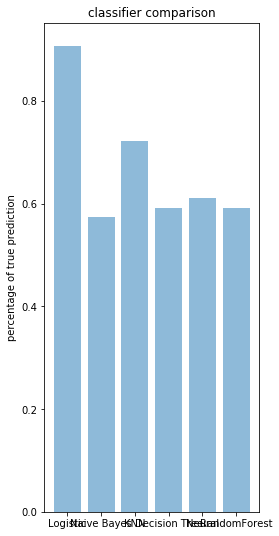

In [103]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
objects = ("Logistic", "Naive Bayes", "KNN", "Decision Tree", "Neural", "RandomForest")
y_pos = np.arange(len(objects))
performance = [0.907,0.574,0.722,0.592,0.611,0.592]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('percentage of true prediction')
plt.title('classifier comparison')
 
plt.show()